In [132]:
#importing pandas
#importing os as to work with local files
import pandas as pd
import os

#defining empty list
frames = []

#loading in all datasets
#datasets are named in such a way to be loaded in like this
#this current path as 619 seperate csv files to be read in
for i in range(1,500):
    df = pd.read_csv(r"C:\Users\tyler\Desktop\all_data\z (" + str(i) + ").csv" )
    frames.append(df)

In [133]:
#merging all of the datasets together
#merged datasets depend on ones read into frames
df = pd.concat(frames, sort=True)

In [134]:
# testing for duplicate rows in the dataframe
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated(subset=None, keep='first')]

#prints out duplacted rows if any
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [backers_count, blurb, category, converted_pledged_amount, country, created_at, creator, currency, currency_symbol, currency_trailing_code, current_currency, deadline, disable_communication, friends, fx_rate, goal, id, is_backing, is_starrable, is_starred, launched_at, location, name, permissions, photo, pledged, profile, slug, source_url, spotlight, staff_pick, state, state_changed_at, static_usd_rate, unread_messages_count, unseen_activity_count, urls, usd_pledged, usd_type]
Index: []


In [135]:
#checking df shape
df.shape

(3777, 39)

In [136]:
#looking at df
pd.set_option('display.max_columns', None)
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type
0,38,"Patented, beautifully designed crank flashligh...","{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",5166,US,1422132218,"{""id"":1435541211,""name"":""Bill Evans & Stan Tan...",USD,$,True,USD,1428601725,False,NaN,1.0000,5000,1221407538,NaN,False,NaN,1426009725,"{""id"":2463583,""name"":""Oakland"",""slug"":""oakland...",Hardware Art: Small Batch Crank Flashlight & ...,NaN,"{""key"":""assets/012/012/636/94bd8000567dfc797dc...",5166.00,"{""id"":1656118,""project_id"":1656118,""state"":""in...",hardware-art-small-batch-crank-flashlight-and-...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1428601726,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",5166.000000,domestic
1,744,Let's make three more episodes of Crash Zoom! ...,"{""id"":29,""name"":""Animation"",""slug"":""film & vid...",42669,GB,1526567487,"{""id"":1897952907,""name"":""Thomas 'TomSka' Ridge...",GBP,£,False,USD,1529514000,False,NaN,1.2688,25000,1834819986,NaN,False,NaN,1526666567,"{""id"":44418,""name"":""London"",""slug"":""london-gb""...",Crash Zoom - Series 2 (Animated Webtoon),NaN,"{""key"":""assets/021/264/487/8b499c0916817eafc84...",32421.97,"{""id"":3383801,""project_id"":3383801,""state"":""in...",crash-zoom-series-2-animated-webtoon,https://www.kickstarter.com/discover/categorie...,True,False,successful,1529514000,1.355851,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",43959.370497,domestic
2,260,"Can a wall plug be smart, dynamic, and compact...","{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",50673,US,1492618297,"{""id"":1307908807,""name"":""Svetlana Schubert and...",USD,$,True,USD,1507999196,False,NaN,1.0000,50000,833051480,NaN,False,NaN,1502815196,"{""id"":2391446,""name"":""Des Moines"",""slug"":""des-...",SnuggPlug 3.0 - Smart&Slim Multi USB Wall Charger,NaN,"{""key"":""assets/016/481/036/b782c69e382d86eed73...",50673.00,"{""id"":2967810,""project_id"":2967810,""state"":""in...",the-snuggplug-smart-and-slim-space-saving-usb-...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1507999196,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",50673.000000,domestic
3,15,"A Science, Math, History and Reading Adventure...","{""id"":272,""name"":""Mobile Games"",""slug"":""games/...",477,US,1340296119,"{""id"":1767325640,""name"":""Chump Genius, Inc."",""...",USD,$,True,USD,1365094464,False,NaN,1.0000,50000,2132116123,NaN,False,NaN,1362506064,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",Chump Genius Card Game App,NaN,"{""key"":""assets/011/384/429/b38377340b1fcbc0508...",477.00,"{""id"":234651,""project_id"":234651,""state"":""inac...",chump-genius-card-game-app,https://www.kickstarter.com/discover/categorie...,False,False,failed,1365094466,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",477.000000,domestic
4,58,A High-Fantasy short film that proves you don'...,"{""id"":296,""name"":""Fantasy"",""slug"":""film & vide...",9386,US,1531443999,"{""id"":1518998549,""name"":""Matthew R. R. Morrese...",USD,$,True,USD,1535266740,False,NaN,1.0000,5000,1600103518,NaN,False,NaN,1533509428,"{""id"":2486982,""name"":""St. Louis"",""slug"":""st-lo...",Canticles: The Adventure Brought to Life,NaN,"{""key"":""assets/021/885/313/e29be0fb443a996dc31...",9386.00,"{""id"":3424107,""project_id"":3424107,""state"":""in...",canticles-the-adventure-brought-to-life,https://www.kickstarter.com/discover/categorie...,True,False,successful,1535266742,1.000000,NaN,NaN,"{""w

In [137]:
#dropping nan values in locatoin column
df['location'].dropna(inplace=True)

In [138]:
#checking for null values
df['launched_at'].isnull().sum()

0

In [139]:
#creating a function that converts strings to dictionaries
import json 

def cat_to_dic(x):
   return json.loads(x) 

import ast
def loc_to_dic(x):
    return ast.literal_eval(str(x))



df['category_dic'] = df['category'].apply(cat_to_dic)

#below is code that was no longer needed
#df['location_dic'] = df['location'].apply(cat_to_dic)

In [140]:
#major datacleaning
def cat_to_id(x):
    return x['id']
def cat_to_name(x):
    return x['name']
def cat_to_slug(x):
    return x['slug']
def cat_to_short_names(x):
    return x['short_names']
def cat_to_displayable_name(x):
    return x['displayable_name']
def cat_to_localized_name(x):
    return x['localized_name']

In [141]:
#major data cleaning
def cat_to_id(x):
    return x['id']
def cat_to_name(x):
    return x['name']
def cat_to_slug(x):
    return x['slug']
def cat_to_position(x):
    return x['position']
def cat_to_parent_id(x):
    return x['parent_id']
def cat_to_state(x):
    return x['state']
def cat_to_type(x):
    return x['state']
def cat_to_color(x):
    return x['color']

In [142]:
#converting to datetime from unix time
df['deadline'] = pd.to_datetime(df['deadline'],unit='s')

In [143]:
#converting to datetime from unix time
df['launched_at'] = pd.to_datetime(df['launched_at'],unit='s')

In [144]:
#creating new feature based on days of campaign
df['total_days'] = df['deadline'] - df['launched_at']

In [145]:
#importing numpy
import numpy as np

In [146]:
#further conveting days
df['total_days'] = df['total_days'].dt.days

In [147]:
#checking total_days dtype
df['total_days'].dtype

dtype('int64')

In [148]:
#Engineering new features
df['blurb_len'] = len(df['blurb'])
df['category_id'] = df['category_dic'].apply(cat_to_id)
df['category_name'] = df['category_dic'].apply(cat_to_name)
df['category_slug'] = df['category_dic'].apply(cat_to_slug)
df['category_position'] = df['category_dic'].apply(cat_to_position)
#df['category_parent_id'] = df['category_dic'].apply(cat_to_parent_id)
df['category_color'] = df['category_dic'].apply(cat_to_color)
df['is_usa'] = df['country'].str.contains('US')
df['is_usd'] = df['currency'].str.contains('USD')
df['name_length'] = len(df['name'])
df['slug_length'] = len(df['slug'])


#engineered features that were uneeded in the end
'''
df['location_id'] = df['location_dic'].apply(cat_to_id)
df['location_name'] = df['location_dic'].apply(cat_to_name)
df['location_slug'] = df['location_dic'].apply(cat_to_slug)
df['location_short_names'] = df['location_dic'].apply(cat_to_short_names)
df['location_displayable_name'] = df['location_dic'].apply(cat_to_displayable_name)
df['location_name'] = df['location_dic'].apply(cat_to_localized_name)
'''

"\ndf['location_id'] = df['location_dic'].apply(cat_to_id)\ndf['location_name'] = df['location_dic'].apply(cat_to_name)\ndf['location_slug'] = df['location_dic'].apply(cat_to_slug)\ndf['location_short_names'] = df['location_dic'].apply(cat_to_short_names)\ndf['location_displayable_name'] = df['location_dic'].apply(cat_to_displayable_name)\ndf['location_name'] = df['location_dic'].apply(cat_to_localized_name)\n"

In [149]:
#spliting the data using train_test_split
from sklearn.model_selection import train_test_split

# Split train into train & test
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['state'], random_state=42)

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['state'], random_state=42)



In [153]:
#bulk imorting libraries to be used in pipeline
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#setting target as state
target = 'state'

#setting features as rest of columns minus columns that leak information 
#about the target
#also dropping all complex features that were choosen not to be used
features = df.columns.drop([target, 'backers_count', 'converted_pledged_amount', 'fx_rate',
                           'is_backing', 'is_starrable', 'is_starred', 'permissions', 'pledged', 'profile',
                            'source_url', 'spotlight', 'state_changed_at', 'static_usd_rate',
                           'unread_messages_count', 'unseen_activity_count', 'urls', 'usd_pledged',
                            'category_dic', 'creator', 'currency_trailing_code', 'current_currency',
                           'disable_communication','blurb','category','created_at','currency_symbol',
                           'deadline','friends','id','launched_at','name','location','photo','slug','usd_type',
                           'blurb_len','category_id','category_slug','category_position','category_color',
                           'is_usa','is_usd','name_length','slug_length'])

#creating our vars to be used in pipline
x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target]
x_test = test[features]

In [154]:
#checking subset trains shape (features)
x_train.shape

(2416, 6)

In [155]:
#checking subset trains shape (target)
y_train.shape

(2416,)

In [156]:
#finding the a baseline score for data

# there are five classes
# the code below shows the percentage
# of value_counts for each class

#using value_counts to find baseline


y_train.value_counts(normalize=True)

successful    0.525248
failed        0.395695
canceled      0.043460
live          0.031871
suspended     0.003725
Name: state, dtype: float64

In [157]:
#creating the pipline using Random forest classifer
#using ordinal encoder to make objtypes numeric
#using simple imputer to fill in nans
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
)

# Fit on train, score on val
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'currency', 'category_name'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': US      1
GB      2
ES      3
IE      4
DE      5
CA      6
SG      7
AU      8
MX      9
IT     10
FR     11
NZ     12
CH     13
AT     14
NL     15
NO     16
SE     17
HK     18
LU     19
DK     20
JP     21
BE     22
NaN    -2
dtype: int64},
                                         {'col': 'currency',
                                          'dat...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
  

In [158]:
#printing out the validation accuracy
print('Validation Accuracy', pipeline.score(x_val, y_val))

Validation Accuracy 0.6413223140495867


In [159]:
#checking the simplified dataframe head
x_train.head()

,country,currency,goal,staff_pick,total_days,category_name
901,US,USD,80000,False,30,Restaurants
3342,US,USD,100000,False,30,Drama
2705,GB,GBP,650,False,60,Festivals
1468,US,USD,108,False,53,Apps
3041,US,USD,25000,False,37,Wearables


In [160]:
#dumping the pipeline into a file for use in web app
from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=True)

['pipeline.joblib']

In [ ]:
#Creating a quick logistic regression model

In [184]:
#importing needed libraries
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

#redifing vars
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


In [185]:
#checking the shape
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2416, 6), (2416,), (605, 6), (605,))

In [186]:
#using ordinal encoding
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [187]:
#using simple imputer to fill null values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [188]:
#Using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [189]:
#fitting the logistic regression
model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Validation Accuracy 0.6082644628099173


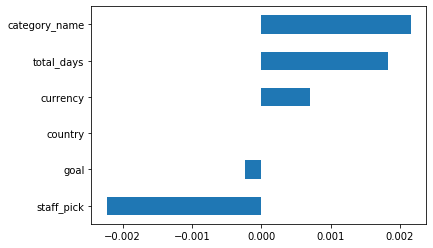

In [190]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbEAAAD4CAYAAABi8NihAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAWxklEQVR4nO3de5CddZ3n8fdHLiqCApJ1vWXa2+hyk0szAyMoAgKOjpdRkdFRLq6sM2spOI6DE1CZklpdXazVUdjISFAZVC6WIMUihqssgp1AEjCiiFDDwjpBEAEVJXz3j/N0eWi6091Jn3T/0u9X1anzXH6350fIp3/PedInVYUkSS16wmwPQJKk9WWISZKaZYhJkppliEmSmmWISZKatflsD2A+2WGHHWpoaGi2hyFJTVm2bNk9VbVgvHOG2EY0NDTEyMjIbA9DkpqS5I6Jznk7UZLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULP+dmKTHGDr+otkegjZBt3/iNQNp15WYJKlZhpgkqVmGmCSpWYaYJKlZhpgkqVkzGmJJ9k/yZzPZpiRJE5npldj+wEBDLD2uICVJUwuxJO9MsjLJiiRfSfIXSa5LckOS7yZ5RpIh4D3AcUluTLJfkgVJzkvyg+71sq69BUkuTbI8yf9KckeSHbpzH0hyU/c6tjs2lGR1ki8Ay4ETk3ymb3zvTnLKBGMfrfvFJDcn+U6SJ/fV+0F3Xecl2ao7viTJqUkuT3Jbklck+VLXzpK+tg9Ocm13Heck2Xra/wUkSett0hBLshOwCDigql4KvB/4HrB3Ve0OfA34UFXdDpwGfKaqdquqq4H/2e3vBbwJOL1r9qPAZVW1B/BNYGHX157AUcCfAnsD706ye1fnxcCXuz4/DbwuyRbduaOAM9ZxGS8CPl9VOwG/7MYCcH5V7dVd12rgXX11tgMOAI4DLgQ+A+wE7JJkty50TwAO6q5jBPjAOPN3TJKRJCNr1qxZxxAlSdM1ld/YcQBwblXdA1BV9ybZBfh6kmcCWwI/m6DuQcCOSUb3n5pkG2Bf4I1de/87yX3d+X2Bb1bVQwBJzgf2Ay4A7qiq73d1HkpyGfDaJKuBLapq1Tqu4WdVdWO3vQwY6rZ3TvJxYFtga+CSvjoXVlUlWQX8fLT9JDd39Z8D7Ahc013flsC1YzuuqsXAYoDh4eFaxxglSdM0lRALMPYv388Bp1TVBUn2Bz42Qd0nAPtU1W8e02Bfqo3T10QeGrN/OvCPwI9Y9yoM4OG+7bXAk7vtJcAbqmpFkiPpfaY3ts6jY+o/Sm/e1gKXVtVfTdK3JGlApvKZ2FLgsCRPB0iyPfA04P9254/oK/sAsE3f/neA947uJNmt2/wecFh37GB6t+4ArgLekGSrJE+ht1q7erxBVdV1wHOBtwFnT+E6xrMNcHd3W/Lt06z7feBlSV4I0I35j9dzHJKk9TBpiFXVzcDJwJVJVgCn0Ft5nZPkauCevuIXAm8cfbADeB8w3D0U8kN6D34AnAQcnGQ58GrgbuCBqlpOb3V0PXAdcHpV3bCO4X0DuKaq7ltHmXU5sevnUnoruimrqjXAkcDZSVbSC7WXrOc4JEnrIVUb/2OaJE8E1lbVI0n2AU6tqt0mqzdOO9+m9+DI0hkf5AAMDw/XyMjIbA9DWid/i70GYUN+i32SZVU1PN652foqloXAN7p/7/U74N3TqZxkW3qrtRWtBJgkaebNSohV1U+A3SctOHH9XwKP+fyp+8xuvEA7sKp+sb59SZLmrk3mSzG7oJr2LUlJUrv89U2SpGZtMisxSTNjUF8jLw2CKzFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSs/xmZ0mPMXT8RbM9BM2SFr/V25WYJKlZhpgkqVmGmCSpWYaYJKlZhpgkqVlzIsSSbJvkbycpM5TkbVNoayjJTdPo+4okw1MtL0maO+ZEiAHbAusMMWAImDTEJEnzx1wJsU8AL0hyY5JPda+bkqxK8ta+Mvt1ZY7rVlxXJ1nevf5sKh0leXKSryVZmeTrwJP7zp2aZCTJzUlO6o4dmOSbfWVeleT8JJslWdI3zuNmbjokSVMxV/6x8/HAzlW1W5I3Ae8BXgrsAPwgyVVdmQ9W1WsBkmwFvKqqfpvkRcDZwFRuC/4N8Ouq2jXJrsDyvnOLqureJJsBS7vzlwGfT7KgqtYARwFnALsBz66qnbvxbDteZ0mOAY4BWLhw4XTmRJI0ibmyEuu3L3B2Va2tqp8DVwJ7jVNuC+CLSVYB5wA7TrH9lwNfBaiqlcDKvnOHJVkO3ADsBOxYVQV8BfjrLqj2AS4GbgOen+RzSQ4FfjVeZ1W1uKqGq2p4wYIFUxyiJGkq5spKrF+mWO444Of0VmxPAH47jT7qcZ0mzwM+COxVVfclWQI8qTt9BnBh18c5VfUIcF+SlwKHAP8VOAw4ehpjkCRtoLmyEnsA2Kbbvgp4a/eZ0wJ6K6frx5QBeBpwd1U9CrwD2GyKfV0FvB0gyc7Art3xpwIPAfcneQbw6tEKVXUXcBdwArCkq7sD8ISqOg84EdhjGtcrSZoBc2IlVlW/SHJN92j8xfRu8a2gt2L6UFX9vyS/AB5JsoJekHwBOC/JW4DL6QXQVJwKnJFkJXAjvYCkqlYkuQG4md6twmvG1DsLWFBVP+z2n921M/qDwIene92SpA0zJ0IMoKrGPj7/92PO/x44cEyZXfu2P9yVux3YeR39/AY4fIJzR65jiPsCX+wruwJXX5I0q+ZMiM1lSZbRW+n93WyPRZL0B5tsiCU5BPjkmMM/q6o3TretqtpzZkYlSZpJm2yIVdUlwCWzPQ5J0uBssiEmaf20+O2+mr/myiP2kiRNmyEmSWqWISZJapYhJklqliEmSWqWISZJapYhJklqliEmSWqWISZJapYhJklqliEmSWqWISZJapYhJklqliEmSWqWISZJapYhJklqliEmSWqW3+ws6TGGjr9otoewwfx26vnDlZgkqVmGmCSpWYaYJKlZhpgkqVmGmCSpWYaYJKlZm3SIJdlszH6SbNLXLEnzSTN/oSd5Z5KVSVYk+UqSJUne3Hf+we59/ySXJ/lXYFWSoSSrk3wBWA48N8nBSa5NsjzJOUm27urenuSk7viqJC/pjm+d5Izu2Mokb0ryriSf6ev/3UlO2aiTIknzXBMhlmQnYBFwQFW9FHj/JFX+BFhUVTt2+y8GvlxVuwMPAScAB1XVHsAI8IG+uvd0x08FPtgdOxG4v6p2qapdgcuArwGvS7JFV+Yo4Ixxxn5MkpEkI2vWrJnehUuS1qmV39hxAHBuVd0DUFX3JllX+eur6md9+3dU1fe77b2BHYFruja2BK7tK3t+974M+Mtu+yDg8NECVXUfQJLLgNcmWQ1sUVWrxg6kqhYDiwGGh4dr8kuVJE1VKyEWYGwAPEK3kkwvjbbsO/fQmLL9+wEuraq/mqCvh7v3tfxhfsbrH+B04B+BHzHOKkySNFhN3E4ElgKHJXk6QJLtgduBPbvzrwe2GL/q43wfeFmSF3ZtbZXkjyep8x3gvaM7SbYDqKrrgOcCbwPOnmL/kqQZ0kSIVdXNwMnAlUlWAKcAXwRekeR64E95/OprorbWAEcCZydZSS/UXjJJtY8D2yW5qev/lX3nvgFcM3qLUZK08bRyO5GqOhM4c8zhvfu2P9yVuwK4oq/e7cDOY9q6DNhrnD6G+rZHgP277QeBIyYY2r7AZyY4J0kaoCZWYnNRkm2T/Bj4TVUtne3xSNJ81MxKbK6pql8Ck32WJkkaIFdikqRmuRKT9Bh+K7Ja4kpMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDbB2SHJtkq9kehyRpfIbYuh0LjBtiSTbbyGORJI3RfIgleWeSlUlWJPlKkj9KsrQ7tjTJwq7ckiRv7qv3YPe+f5Irkpyb5EdJzkrP+4BnAZcnuXy0TpJ/SnIdcEKSb/a196ok52/Ui5ekeW7z2R7AhkiyE7AIeFlV3ZNke+BM4MtVdWaSo4HPAm+YpKndgZ2Au4BruvY+m+QDwCur6p6u3FOAm6rqI0kCrE6yoKrWAEcBZ4wzxmOAYwAWLly4oZcsSerT+krsAODc0ZCpqnuBfYB/7c5/Bdh3Cu1cX1V3VtWjwI3A0ATl1gLndX1V1/5fJ9m26/fisRWqanFVDVfV8IIFC6Z8YZKkyTW9EgMC1CRlRs8/Qhfa3Spqy74yD/dtr2XiefltVa3t2z8DuBD4LXBOVT0yxXFLkmZA6yuxpcBhSZ4O0N1O/D/A4d35twPf67ZvB/bstl8PbDGF9h8AtpnoZFXdRe8W5AnAkukNXZK0oZpeiVXVzUlOBq5Msha4AXgf8KUkfw+MflYF8EXgW0mupxd+D02hi8XAxUnurqpXTlDmLGBBVf1wQ65FkjR96X20o/WV5J+BG6rqXyYrOzw8XCMjIxthVJK06UiyrKqGxzvX9EpstiVZRm9F93ezPRZJmo8MsQ1QVXtOXkqSNCitP9ghSZrHDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzDDFJUrMMMUlSswwxSVKzNp/tAUiaWUPHX7RB9W//xGtmaCTS4LkSkyQ1yxCTJDXLEJMkNcsQkyQ1yxCTJDXLEJshST6W5IOzPQ5Jmk8MMUlSs/x3YkCSE4G3A/8G3AMsA74LnAZsBfwUOLqq7kvybuAYYEvgVuAdVfXrWRm4JM1z834llmQYeBOwO/CXwHB36svAP1TVrsAq4KPd8fOraq+qeimwGnjXJO0fk2QkyciaNWsGcg2SNF/N+xAD9gW+VVW/qaoHgAuBpwDbVtWVXZkzgZd32zsnuTrJKnqrt53W1XhVLa6q4aoaXrBgwYAuQZLmJ0MMMs3yS4D3VtUuwEnAk2Z8RJKkKTHE4HvAXyR5UpKtgdcADwH3JdmvK/MOYHRVtg1wd5It6K3EJEmzZN4/2FFVP0hyAbACuAMYAe4HjgBOS7IVcBtwVFflROC6ruwqeqEmSZoF8z7EOp+uqo91gXUV8D+q6kZg77EFq+pU4NRxjn9s4KOUJD2GIdazOMmO9D7fOrOqls/2gCRJkzPEgKp622yPQZI0fT7YIUlqliEmSWqWtxOlTcztn3jNbA9B2mhciUmSmmWISZKaZYhJkppliEmSmmWISZKaZYhJkppliEmSmmWISZKaZYhJkppliEmSmmWISZKaZYhJkppliEmSmmWISZKaZYhJkppliEmSmmWISZKa5Tc7N2To+ItmewiaB/xmaLXElZgkqVmGmCSpWYaYJKlZhpgkqVmGmCSpWc2EWJJjk2w1hXL7Jbk5yY1JnpzkU93+p6bZ33CSz05S5sHptClJmlktPWJ/LPBV4NeTlHs78OmqOgMgyX8BFlTVw9PprKpGgJH1GagkaeOYkyuxJE9JclGSFUluSvJR4FnA5Uku78qcmmSkW2Wd1B37z8BhwEeSnJXkAuApwHVJ3jpBX0uSnJbk6iQ/TvLa7vj+Sb7dbW+d5Iwkq5KsTPKmMW3skOTaJP4DG0naiObqSuxQ4K6qeg1AkqcBRwGvrKp7ujKLqureJJsBS5PsWlWnJ9kX+HZVndvVfbCqdpukvyHgFcAL6AXlC8ecPxG4v6p26drcbvREkmcAFwAnVNWlYxtOcgxwDMDChQunPgOSpEnNyZUYsAo4KMknk+xXVfePU+awJMuBG4CdgB03oL9vVNWjVfUT4DbgJWPOHwR8fnSnqu7rNrcAlgIfGi/AurKLq2q4qoYXLFiwAUOUJI01J0Osqn4M7EkvzP5bko/0n0/yPOCDwIFVtStwEfCkDelykv2McwzgEWAZcMgG9C1JWk9zMsSSPAv4dVV9Ffg0sAfwALBNV+SpwEPA/d3tvFdvYJdvSfKEJC8Ang/cMub8d4D39o1v9HZiAUcDL0ly/AaOQZI0TXP1M7FdgE8leRT4PfA3wD7AxUnurqpXJrkBuJne7b9rNrC/W4ArgWcA76mq3ybpP/9x4PNJbgLWAicB5wNU1dokhwMXJvlVVX1hA8ciSZqiORliVXUJcMmYwyPA5/rKHDlB3SPH7G89hS6vqarjxtS7Arii234QOGKcvrbu3n+HtxQlaaObk7cTJUmaijm5EhuEJIuAt4w5fM5EKzpJ0tw3b0Ksqk4GTp7tcUiSZs68CbFNgd+4K0mP5WdikqRmGWKSpGYZYpKkZhlikqRmGWKSpGYZYpKkZhlikqRmGWKSpGalaryvydIgJFkD3DGLQ9gBuGfSUvOLc/J4zsn4nJfH21hz8kdVNe63Chti80iSkaoanu1xzCXOyeM5J+NzXh5vLsyJtxMlSc0yxCRJzTLE5pfFsz2AOcg5eTznZHzOy+PN+pz4mZgkqVmuxCRJzTLEJEnNMsQal2T7JJcm+Un3vt0E5Y7oyvwkyRF9x/dMsirJrUk+myTd8U8l+VGSlUm+mWTbjXVNM2GA8/KWJDcneTRJE49bJzk0yS3dtRw/zvknJvl6d/66JEN95z7cHb8lySFTbXOuG9CcfCnJvye5aeNcxcya6TlJ8twklydZ3f0/8/6BDLyqfDX8Av47cHy3fTzwyXHKbA/c1r1v121v1527HtgHCHAx8Oru+MHA5t32J8drdy6/Bjgv/wl4MXAFMDzb1zmFedgM+CnwfGBLYAWw45gyfwuc1m0fDny9296xK/9E4HldO5tNpc25/BrEnHTnXg7sAdw029c4F+YEeCawR1dmG+DHg/hz4kqsfa8Hzuy2zwTeME6ZQ4BLq+reqroPuBQ4NMkzgadW1bXV+5P25dH6VfWdqnqkq/994DmDvIgBGNS8rK6qWwY//BnzJ8CtVXVbVf0O+Bq9uenXP1fnAgd2K8/XA1+rqoer6mfArV17U2lzLhvEnFBVVwH3bowLGIAZn5OquruqlgNU1QPAauDZMz1wQ6x9z6iquwG69/8wTplnA//Wt39nd+zZ3fbY42MdTW810pKNMS8tmOgaxy3T/eByP/D0ddSdSptz2SDmpHUDnZPu1uPuwHUzOGYANp/pBjXzknwX+I/jnFo01SbGOVbrON7f9yLgEeCsKfa10czmvDRkKtcy3XkY74ffluZnEHPSuoHNSZKtgfOAY6vqV+s9wgkYYg2oqoMmOpfk50meWVV3d7fB/n2cYncC+/ftP4feZzp38tjbhM8B7upr+wjgtcCB3W21OWW25qUxdwLP7dsf71pGy9yZZHPgafRui62r7mRtzmWDmpOWDWROkmxBL8DOqqrzBzFwbye27wJg9Km6I4BvjVPmEuDgJNt1T+kdDFzS3WZ7IMne3b3td47WT3Io8A/A66rq14O+iAEYyLw06AfAi5I8L8mW9D6Qv2BMmf65ejNwWfdDywXA4d1Tac8DXkTvgZeptDmXDWJOWjfjc9L9v/MvwOqqOmVgI5/tp2J8bdiL3j3ppcBPuvftu+PDwOl95Y6m94HrrcBRfceHgZvoPVH0z/zht7jcSu8+943d67TZvtY5Mi9vpPeT58PAz+mF3qxf7yRz8ef0ngz7KbCoO/ZP9H5AAXgScE43B9cDz++ru6irdwvdE5oTtdnSa0BzcjZwN/D77s/Iu2b7OmdzToB96d1WXNn398ifz/S4/bVTkqRmeTtRktQsQ0yS1CxDTJLULENMktQsQ0yS1CxDTJLULENMktSs/w/uRcNY/Nh28QAAAABJRU5ErkJggg==